## Kickstarter Projects
課題：クラウドファンディングが成功するかを**事前に**予測するモデルの構築を目指す。
# Day1

## 1 準備
### 1.1 ライブラリのインポート

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 データのインポート

In [2]:
df_ks = pd.read_csv("./ks-projects-201801.csv")

#### データの中身の確認

In [3]:
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


いくつかは欠測値あり。

In [4]:
# データを確認する。
df_ks

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


変数の意味について確認する。現時点での直感もメモしておく。

|columns|型|説明|直感メモ|
|:-|:-:|:-|:-|
|ID|整数|ID|意味はなさそう。|
|name|文字列|クラウドファンディング名|長短や特定のワードが使えるか？|
|category|文字列|カテゴリ|集まりやすいもの、集まりにくいものがありそう。|
|main_category|文字列|大分類|集まりやすいもの、集まりにくいものがありそう。|
|currency|文字列|通貨|クラウドファンディングという文化が盛んか否かを説明できるのでは？|
|deadline|文字列(日付)|締め切り日|開始日と合わせれば使える？|
|goal|実数|目標金額|大きいほど大変であると想像ができる。**通貨単位が異なる**|
|launched|文字列(日付)|開始日|締め切り日と合わせれば使える？|
|pledged|実数|集まった額？|**結果なので使えない**|
|state|文字列|結果|**目的変数**|
|backers|整数|支援者数|**結果なので使えない**|
|country|文字列|地域|クラウドファンディング文化が影響するのでは。|
|usd pledged|実数|ドル換算の支援額(by KS)|**結果**|
|usd_pledged_real|実数|ドル換算の支援額(by fixer.io api)|**結果**|
|usd_goal_real|実数|ドル換算の目標(by fixer.io api)|**通貨単位**が揃ったので、説明変数としてはgoalではなくこちらを使う。|

### 説明変数のサンプルサイズ
カテゴリ変数は後にダミー変数として置き換えるが、本データはカテゴリ変数が多いため全てを置き換えるのは面倒である。また、少ない標本数からの不確かな標本比率を用いて学習されるのは望ましくない。  
そこで、有意なカテゴリとして考慮してよい最低のサンプル数について確認する。
これに満たないカテゴリに関しては考慮しないこととする。(othersとする。)

In [5]:
# 全データのsuccessfulの割合
df_ks["state"].value_counts()[1] / len(df_ks)

0.3537623362321443

信頼区間は5%、信頼係数は95%、推定値を上記で求めた40%として求まるサンプル数は1475となる。参考：https://bellcurve.jp/statistics/course/9129.html  
後にトレーニングデータ：テストデータ=7:3に分割する予定なので、最低のサンプル数は**2100**とすることとする。(1475/0.7=2107)

## 2 前処理
### 2.1 使えないデータの削除
クラウドファンディングの開始時点でわからない、すなわち結果に相当するデータは予測には使えないため、削除する。

In [6]:
df_ks = df_ks.drop(columns=['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real'])

### 2.2 目的変数の加工
目的変数(state)を成功(1)、失敗(0)に二値化する。また、成功および失敗以外のstateの取り扱いについて考える。

In [7]:
# stateの確認
df_ks["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [8]:
# failed, successful以外の割合を計算
np.sum(df_ks["state"].value_counts()[2:]) / df_ks.shape[0]

0.12408460337874774

failedおよびsuccessful以外のデータは全体の12.4 %であった。少々もったいないが、failedまたはsuccessfulのどちらに入れてよいかもわからないので、削除することとする。

In [9]:
# 削除
df_ks = df_ks[df_ks['state'] != 'canceled']
df_ks = df_ks[df_ks['state'] != 'undefined']
df_ks = df_ks[df_ks['state'] != 'live']
df_ks = df_ks[df_ks['state'] != 'suspended'] # スマートな書き方がありましたらご教授ください。

In [10]:
# 二値化
df_ks["state"] = df_ks["state"] == "successful" # successful=>True, failed=>False
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             331675 non-null  int64  
 1   name           331672 non-null  object 
 2   category       331675 non-null  object 
 3   main_category  331675 non-null  object 
 4   currency       331675 non-null  object 
 5   deadline       331675 non-null  object 
 6   launched       331675 non-null  object 
 7   state          331675 non-null  bool   
 8   country        331675 non-null  object 
 9   usd_goal_real  331675 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 25.6+ MB


In [11]:
df_ks

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,False,GB,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,False,US,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,False,US,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,False,US,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,True,US,50000.00
...,...,...,...,...,...,...,...,...,...,...
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,2017-03-20 22:08:22,False,US,6500.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,False,US,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,False,US,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,False,US,15000.00


### 2.3 欠損値の確認

In [12]:
df_ks.isnull().sum()

ID               0
name             3
category         0
main_category    0
currency         0
deadline         0
launched         0
state            0
country          0
usd_goal_real    0
dtype: int64

欠損値は3つのみであるから、名無しのデータは削除することにした。

In [13]:
df_ks = df_ks.dropna()

## 3 可視化
データを可視化し、説明変数と目的変数の関係について考察する。

## 3.1 地域
地域ごとに違いがあるか検討する。

In [14]:
df_ks

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,False,GB,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,False,US,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,False,US,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,False,US,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,True,US,50000.00
...,...,...,...,...,...,...,...,...,...,...
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,2017-03-20 22:08:22,False,US,6500.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,False,US,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,False,US,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,False,US,15000.00


In [15]:
df_ks["country"].value_counts()

US      261358
GB       29453
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: country, dtype: int64

In [16]:
# 2100以上のデータがあるcountryのみ利用
# データ数が2100以上のカテゴリを抜き出す
df_country = pd.DataFrame() # 空のdataframe
for index, value in df_ks['country'].value_counts().iteritems():
    if value < 2100:
        df_tmp = df_ks[(df_ks["country"]==index)]
        df_tmp["country"] = "others"
        df_country = pd.concat([df_country, df_tmp])
        continue
    df_country = pd.concat([df_country, df_ks[(df_ks["country"]==index)]])

D:\programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


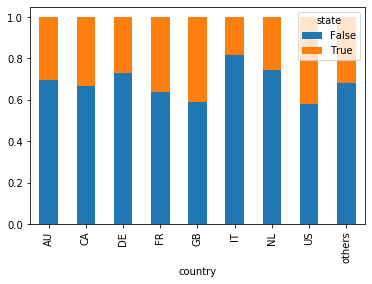

In [17]:
country_state = pd.crosstab(df_country["country"], df_country["state"], normalize="index")
country_state.plot.bar(stacked=True)
plt.show()

地域ごとに違いが見られたため、説明変数として使えると考えられる。  
成功率の高かった上位2か国であるアメリカおよびイギリスはデータ数も多い。

### 通貨
最初に通貨を「クラウドファンディング文化が盛んか否かを説明する変数として使えそう」と予想したが、地域とどちらかでも良い気がするので確認する。

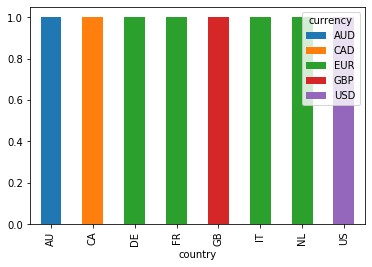

In [18]:
country_currency = pd.crosstab(df_country.loc[df_country["country"]!="others", "country"], df_country["currency"], normalize="index")
country_currency.plot.bar(stacked=True)
plt.show()

国ごとの通貨がほぼ100%であり、予想通りであった。  
地域と通貨のどちらか1方で良いと考えられるが、情報量の多い**地域(country)を採用**することとする。

**メモ**  
このcountryとcurrencyのように説明変数間で相関係数が高い場合「多重共線性」が引き起こされる可能性が高いと考えられる。

## 3.2 カテゴリ
### メインカテゴリ
集まりやすいカテゴリ、集まりにくいカテゴリが存在すると予想されるので可視化する。

In [19]:
df_ks["main_category"].value_counts()

Film & Video    56526
Music           45949
Publishing      35445
Games           28520
Technology      27050
Art             25640
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

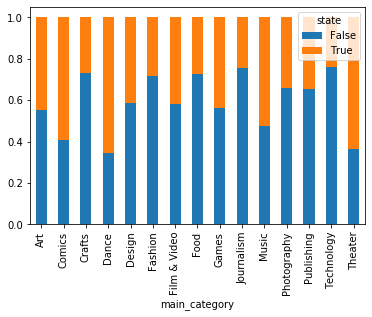

In [20]:
# 全カテゴリで2100以上だったのでそのまま使う
maincategory_state = pd.crosstab(df_ks["main_category"], df_ks["state"], normalize="index")
maincategory_state.plot.bar(stacked=True)
plt.show()

メインカテゴリごとに成功率が大きく異なることから、説明変数として有用であると予想される。

### カテゴリ
同様に集まりやすいカテゴリ、集まりにくいカテゴリが存在すると考えられる。

In [21]:
df_ks["category"].value_counts()

Product Design     18680
Documentary        14523
Music              12633
Tabletop Games     11744
Shorts             11394
                   ...  
Residencies           68
Letterpress           46
Chiptune              33
Literary Spaces       19
Taxidermy             10
Name: category, Length: 159, dtype: int64

In [22]:
# データ数が2100以上のカテゴリを抜き出す
df_category = pd.DataFrame() # 空のdataframe
for index, value in df_ks['category'].value_counts().iteritems():
    if value < 2100:
        df_tmp = df_ks[(df_ks["category"]==index)]
        df_tmp["category"] = "others"
        df_category = pd.concat([df_category, df_tmp])
        continue
    df_category = pd.concat([df_category, df_ks[(df_ks["category"]==index)]])

D:\programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


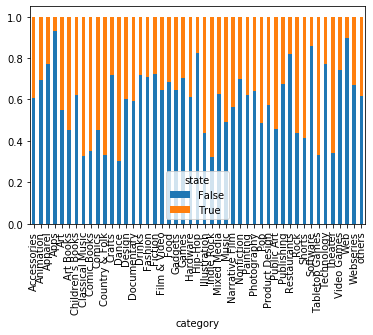

In [23]:
category_state = pd.crosstab(df_category["category"], df_category["state"], normalize="index")
category_state.plot.bar(stacked=True)
plt.show()

極端に成功率が高いカテゴリまたは低いカテゴリが存在することから、説明変数として有用であると予想する。

## 3.3 目標金額
通貨単位がバラバラな"goal"ではなく、ドル換算された"usd_goal_real"を使用する。

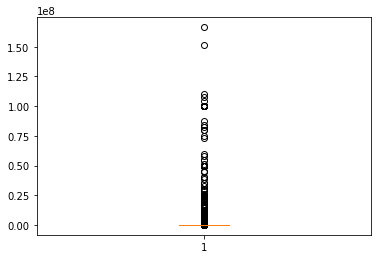

In [24]:
# 箱ひげ図
plt.boxplot(df_ks["usd_goal_real"])
plt.show()

数オーダー大きい値がいくつかあるため、箱が見えなくなっている。

In [25]:
df_ks.loc[:,"usd_goal_real"].describe()

count    3.316720e+05
mean     4.150966e+04
std      1.108935e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

オーダーごとにカテゴライズすることを考える。

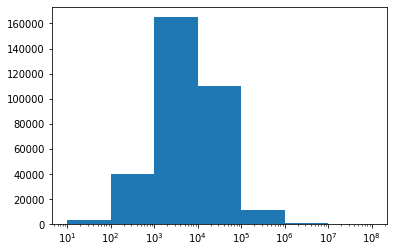

In [26]:
plt.hist(df_ks["usd_goal_real"], bins=np.logspace(1, 8, 8))
plt.gca().set_xscale("log")
plt.show()

100ドル以下と1000,000ドル以上は値が少ないので、まとめてカテゴライズする。

In [27]:
# usd_goal_realのオーダーと成功/失敗のみのデータフレームを作成する。
df_goal_band = pd.DataFrame() # 空のdataframe
df_goal_band["state"] = df_ks["state"]
df_goal_band["goal_band"] = pd.cut(df_ks["usd_goal_real"], [0, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e9],\
    labels=["~10^2", "10^2-", "10^3-", "10^4-", "10^5-", "10^6-", "10^7~"])

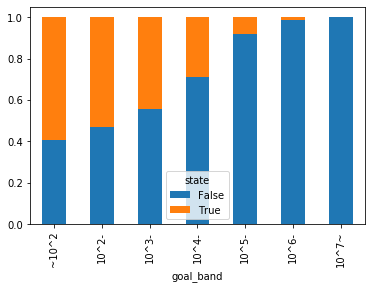

In [28]:
# 可視化
goalband_state = pd.crosstab(df_goal_band["goal_band"], df_ks["state"], normalize="index")
goalband_state.plot.bar(stacked=True)
plt.show()

目標金額のオーダーごとに特徴が見出せたと考えられる。

## 4 機械学習モデルの構築
ここまでの検討を踏まえ、ロジスティック回帰を用いて説明変数を地域(country)、メインカテゴリ(main_category)、カテゴリ(category)および目標金額(usd_goal_real)とし、説明変数を結果(state)とするモデルを構築する。

## 4.1 データの準備

In [29]:
df_ML = pd.DataFrame() # 煩雑になってきたので、使うものだけここに入れる。
df_ML["state"] = df_ks["state"]

### ダミー変数への変換
地域、メインカテゴリおよびカテゴリは質的変数であるから、ダミー変数への変換を行う。

In [30]:
# 地域
df_ML = pd.concat([df_ML, pd.get_dummies(df_country["country"], sparse=True)], axis=1)
# sparse: メモリの削減
df_ML = df_ML.drop(columns="others") # 全て0ならothers

In [31]:
print(df_ML) # 全て0ならothers

        state  AU  CA  DE  FR  GB  IT  NL  US
0       False   0   0   0   0   1   0   0   0
1       False   0   0   0   0   0   0   0   1
2       False   0   0   0   0   0   0   0   1
3       False   0   0   0   0   0   0   0   1
5        True   0   0   0   0   0   0   0   1
...       ...  ..  ..  ..  ..  ..  ..  ..  ..
378654  False   0   0   0   0   0   0   0   1
378657  False   0   0   0   0   0   0   0   1
378658  False   0   0   0   0   0   0   0   1
378659  False   0   0   0   0   0   0   0   1
378660  False   0   0   0   0   0   0   0   1

[331672 rows x 9 columns]


In [32]:
# メインカテゴリ
df_ML = pd.concat([df_ML, pd.get_dummies(df_ks["main_category"], prefix="main_category", sparse=True)], axis=1)
df_ML = df_ML.drop(columns="main_category_Theater") # 全て0ならTheater

In [33]:
# カテゴリ
df_ML = pd.concat([df_ML, pd.get_dummies(df_category["category"], prefix="category", sparse=True)], axis=1)
df_ML = df_ML.drop(columns="category_others") # 全て0ならothers

### 数値データのカテゴライズ
目標金額(usd_goal_real)をカテゴライズする。  

|金額|～10^2|10^2-|10^3-|10^4-|10^5-|10^6-|10^7～|
|---|---|---|---|---|---|---|---|
|goal_band|1|2|3|4|5|6|7|

In [34]:
df_ML["goal_band"] = pd.cut(df_ks["usd_goal_real"], [0, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e9], labels=range(1,8))

In [35]:
df_ML.info() # 確認

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331672 entries, 0 to 378660
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype           
---  ------                      --------------   -----           
 0   state                       331672 non-null  bool            
 1   AU                          331672 non-null  Sparse[int32, 0]
 2   CA                          331672 non-null  Sparse[int32, 0]
 3   DE                          331672 non-null  Sparse[int32, 0]
 4   FR                          331672 non-null  Sparse[int32, 0]
 5   GB                          331672 non-null  Sparse[int32, 0]
 6   IT                          331672 non-null  Sparse[int32, 0]
 7   NL                          331672 non-null  Sparse[int32, 0]
 8   US                          331672 non-null  Sparse[int32, 0]
 9   main_category_Art           331672 non-null  Sparse[uint8, 0]
 10  main_category_Comics        331672 non-null  Sparse[uint8, 0]
 11  main_category

## 4.2 学習と識別
### 学習
ここまでで用意したデータを使って、学習させる。

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, precision_recall_fscore_support

In [37]:
# トレーニングデータと、検証用データに分ける。
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df_ML, test_size=0.3, random_state=1234)

In [38]:
# それぞれ説明変数、目的変数に分ける
train_X = df_train[df_ML.columns[1:]]
train_Y = df_train[df_ML.columns[0]]
test_X  = df_test[df_ML.columns[1:]]
test_Y  = df_test[df_ML.columns[0]]

In [39]:
# ロジスティック回帰
clf = SGDClassifier(loss="log", penalty="none", max_iter=1000, fit_intercept=True, random_state=1234, tol=1e-4)
clf.fit(train_X, train_Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='none', power_t=0.5,
              random_state=1234, shuffle=True, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### 識別
テストデータを用いて作成したモデルを評価する。

In [40]:
# 予測
y_pred = clf.predict(test_X)

In [41]:
# 結果を確認する
accuracy = accuracy_score(test_Y, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(test_Y, y_pred)
print('正答率（Accuracy）  = {:.3f}%'.format(100 * accuracy))
print('再現率（Recall）    = {:.3f}%'.format(100 * recall[0]))
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))

正答率（Accuracy）  = 65.864%
再現率（Recall）    = 78.002%
適合率（Precision） = 68.860%


In [42]:
# クロス集計
conf_mat = confusion_matrix(test_Y, y_pred)
conf_mat = pd.DataFrame(conf_mat, 
                        index=['正解 = 失敗', '正解 = 成功'], 
                        columns=['予測 = 失敗', '予測 = 成功'])
conf_mat

,予測 = 失敗,予測 = 成功
正解 = 失敗,46260,13046
正解 = 成功,20920,19276


## 5 まとめ

データを処理、変換してモデルに渡し、予測することはできたが思ったように精度が出なかった。  
目標金額が非常に大きかったり、成功率が低いジャンルが存在するため失敗を特徴づける変数は比較的多いように思えた。そのため、現時点では失敗よりも成功を予測するのが難しいと感じている。